In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("dielectron.csv")
df.columns[3]

'px1 '

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Run,100000.0,1.479353e+05,9.203061e+02,146511.000000,1.471140e+05,1.479290e+05,1.490110e+05,1.491820e+05
Event,100000.0,4.957212e+08,4.037703e+08,6414.000000,2.023970e+08,3.902759e+08,6.338891e+08,1.791247e+09
E1,100000.0,3.643647e+01,4.121620e+01,0.377928,8.458595e+00,2.171700e+01,5.000335e+01,8.506020e+02
px1,100000.0,1.358968e-01,1.340498e+01,-250.587000,-5.233675e+00,1.413385e-01,5.714560e+00,1.345390e+02
py1,100000.0,1.822913e-01,1.347028e+01,-126.079000,-5.276248e+00,9.909205e-02,5.648087e+00,1.474670e+02
pz1,100000.0,-1.508037e+00,5.160365e+01,-840.987000,-1.585983e+01,-3.129870e-01,1.321265e+01,7.600960e+02
pt1,100000.0,1.441217e+01,1.238874e+01,0.219629,3.771172e+00,1.296780e+01,2.001892e+01,2.655780e+02
eta1,100000.0,-6.409547e-02,1.462137e+00,-4.165380,-1.283883e+00,-6.117850e-02,1.144408e+00,2.622970e+00
phi1,100000.0,2.161430e-02,1.799562e+00,-3.141580,-1.527030e+00,3.432395e-02,1.562355e+00,3.141420e+00
Q1,100000.0,-5.480000e-03,9.999900e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00


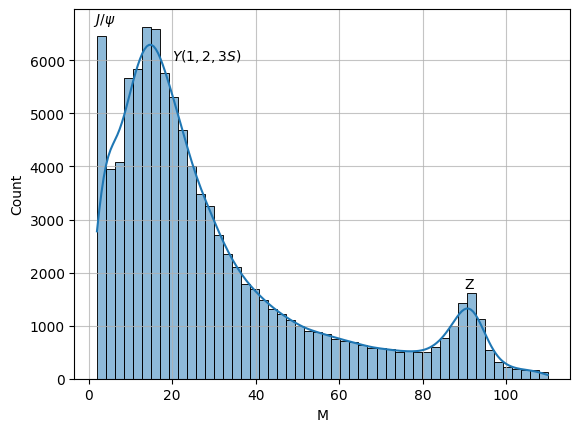

In [5]:
target = "M"
sb.histplot(df[target], bins= 50, kde=True)
plt.grid(alpha = 0.75)
plt.annotate("Z", xy=(90, 1700))  # Z boson
plt.annotate("$J/\\psi$", xy=(1, 6700))  # J/psi meson
plt.annotate("$Y(1,2,3S)$", xy=(20, 6000))  # Upsilon meson

plt.show()

In [6]:
# List of numerical features
numerical_features = [
    "E1", "px1 ",
    "py1",
    "pz1",
    "pt1",
    "eta1",
    "phi1",
    "E2",
    "px2",
    "py2",
    "pz2",
    "pt2",
    "eta2",
    "phi2",
]

In [7]:
df[numerical_features]

,E1,px1,py1,pz1,pt1,eta1,phi1,E2,px2,py2,pz2,pt2,eta2,phi2
0,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810
1,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920
2,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570
3,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865
4,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470
99996,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960
99997,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050
99998,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610


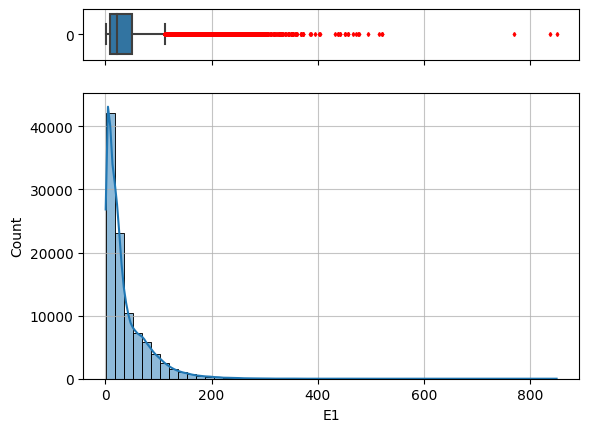

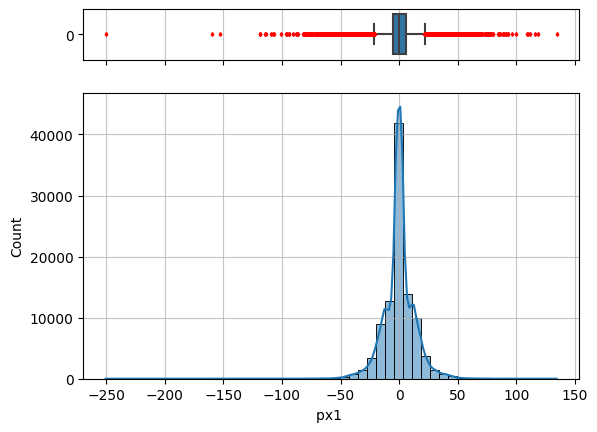

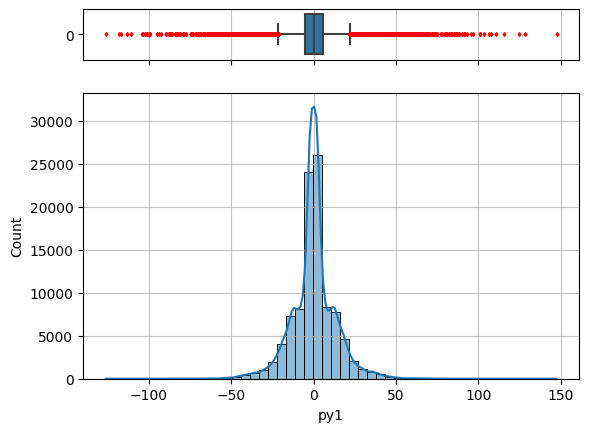

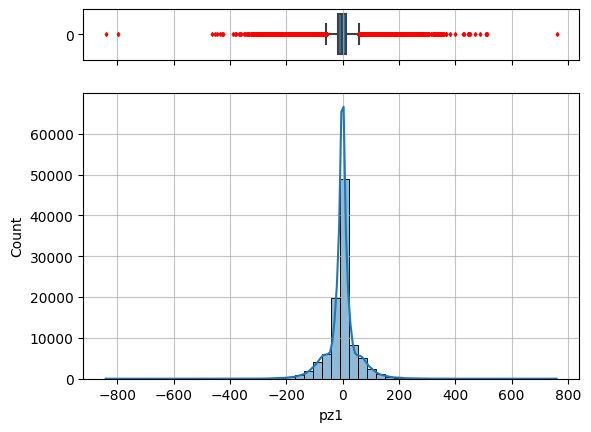

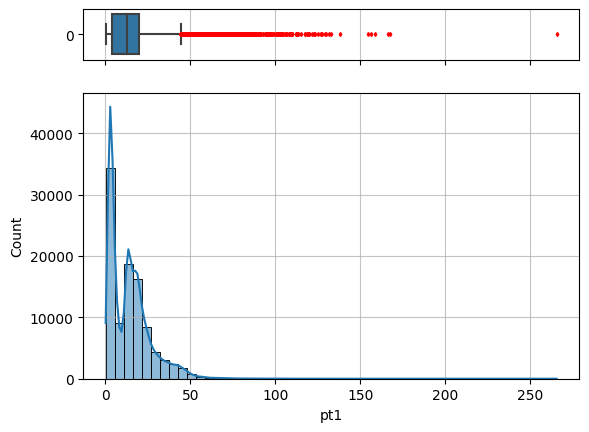

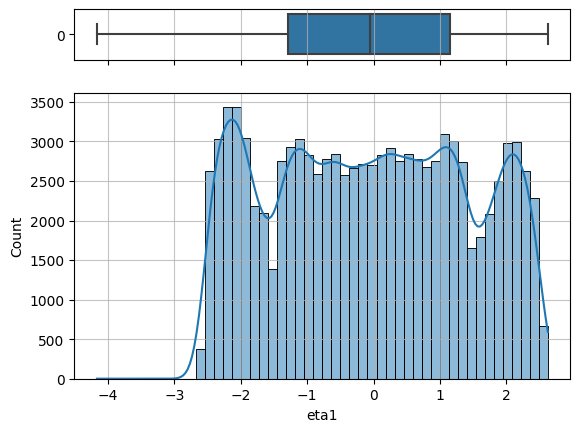

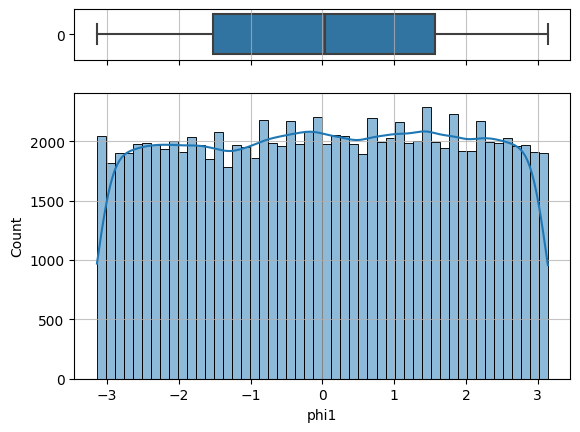

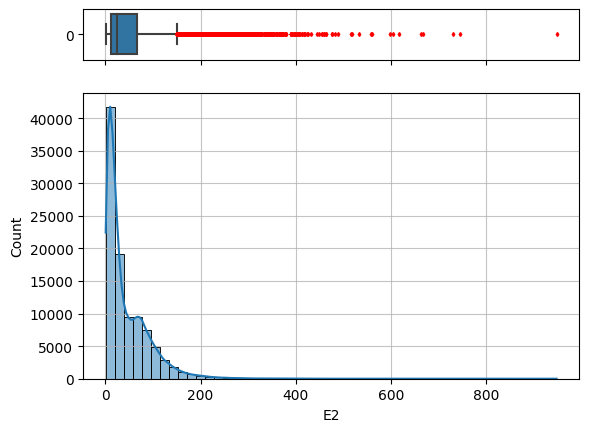

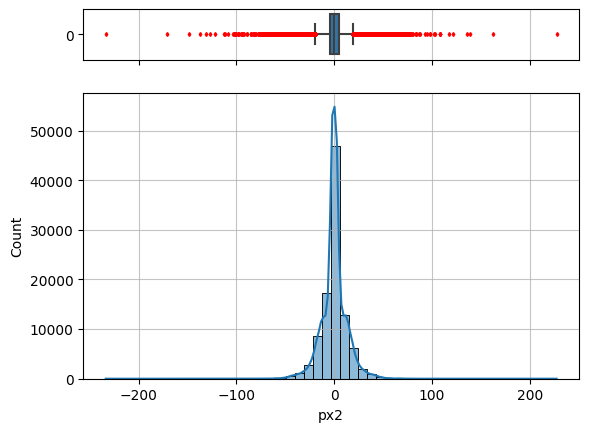

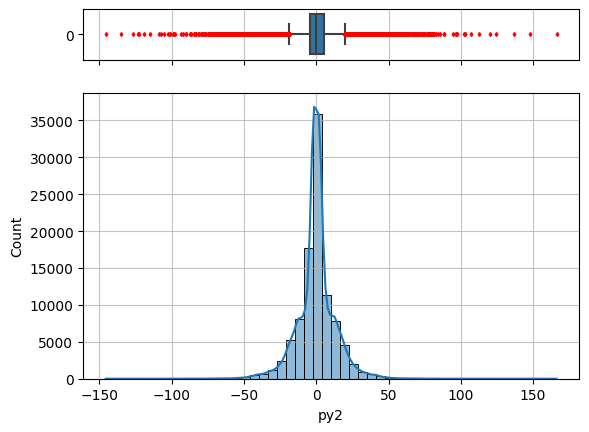

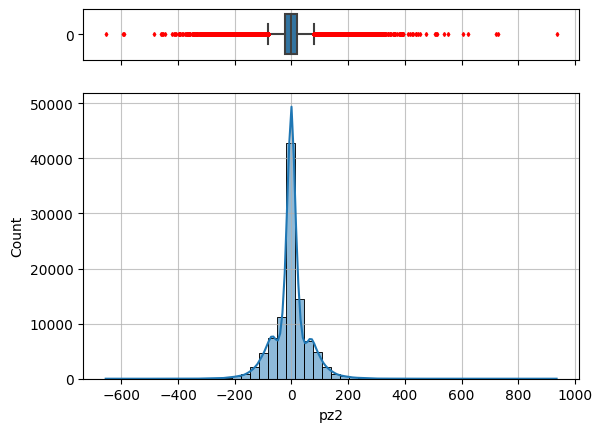

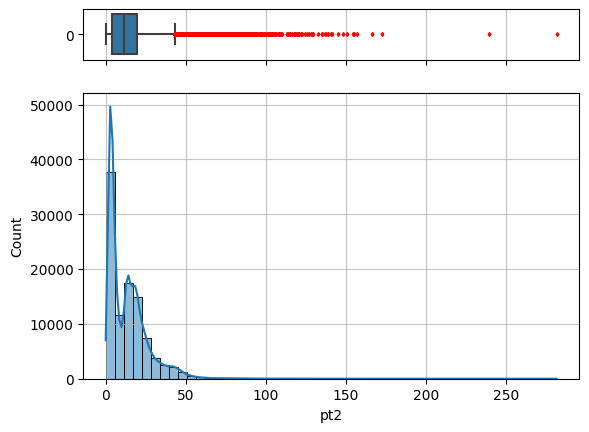

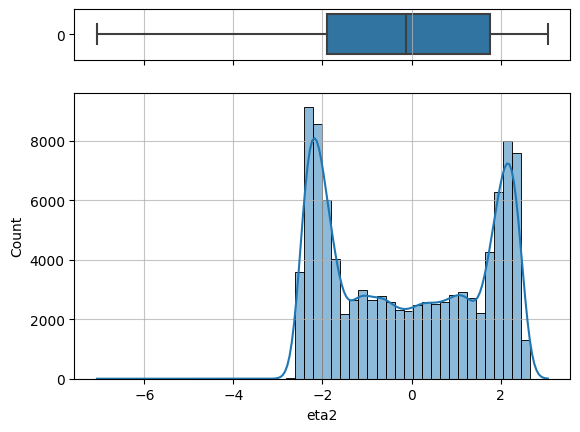

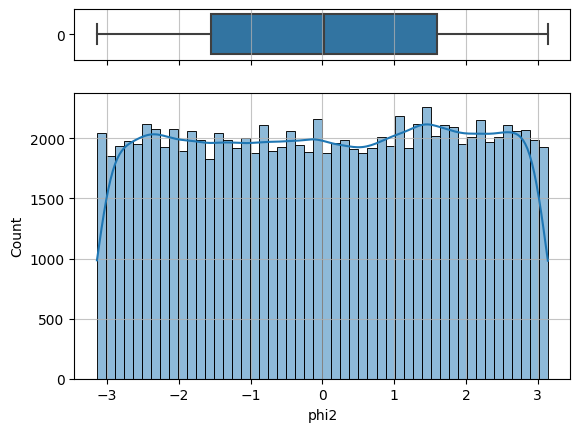

In [8]:
for f in numerical_features:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)})
    ax_box.grid(alpha=0.75)
    ax_hist.grid(alpha=0.75)
    flierprops = dict(
        markerfacecolor="r", markersize=2, linestyle="none", markeredgecolor="r"
    )
    sb.boxplot(df[f], orient="h", ax=ax_box, flierprops=flierprops)
    sb.histplot(df[f], ax=ax_hist, bins=50, kde=True)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.show()

In [9]:
X = df.drop(columns=[target])  # Features
y = df[target]

In [12]:
for f in numerical_features:
    q1=df[f].quantile(0.25)
    q3=df[f].quantile(0.75)
    IQR=q3-q1
    new_df = df[f]

In [13]:
outliers

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
